In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    "cleaned_vgsales.csv",
    dtype={
        "Rank": np.int16,
        "Year": np.int16,
        "NA_Sales": np.float32,
        "EU_Sales": np.float32,
        "JP_Sales":	np.float32,
        "Other_Sales": np.float32,
        "Global_Sales": np.float32,
    },
    index_col=0,
)
df.drop(columns=['is_global_ok'], inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.830002
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.379999
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.010000,0.00,0.00,0.00,0.010000
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.010000,0.00,0.00,0.00,0.010000
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.000000,0.00,0.00,0.00,0.000000


In [4]:
df.info()

<class 'pandas.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  str    
 1   Platform      16598 non-null  str    
 2   Year          16598 non-null  int16  
 3   Genre         16598 non-null  str    
 4   Publisher     16598 non-null  str    
 5   NA_Sales      16598 non-null  float32
 6   EU_Sales      16598 non-null  float32
 7   JP_Sales      16598 non-null  float32
 8   Other_Sales   16598 non-null  float32
 9   Global_Sales  16598 non-null  float32
dtypes: float32(5), int16(1), str(4)
memory usage: 907.7 KB


## Changing a column's name

In [5]:
df.rename(columns={"Publisher": "Company"}, inplace=True)

In [6]:
df.head()

,Name,Platform,Year,Genre,Company,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.490002,29.02,3.77,8.46,82.739998
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.58,6.81,0.77,40.240002
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.88,3.79,3.31,35.830002
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.01,3.28,2.96,33.000000
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.89,10.22,1.00,31.379999


## Grouping

`groupby` is used to get all data that are grouped by a Type

<p dir='rtl'>
<code>groupby</code> تستخدم لتجميع البيانات على حسب فئةً ما
</p>

for example, we need to group all Rows With the Same `Platform` type and get the total of `Global_Sales`

<p dir='rtl'>
مثال, نريد تجميع كل الصفوف التى لديها نفس نوع <code>Platform</code> وحساب مجموع <code>Global_Sales</code>
</p>

In [7]:
df.groupby("Platform")['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1255.770020
X360     979.599976
PS3      957.890015
Wii      926.049988
DS       821.460022
PS       730.840027
GBA      317.850006
PSP      296.220001
PS4      278.160004
PC       257.989990
XB       257.739990
GB       255.460007
NES      251.050003
3DS      247.369995
N64      218.679993
SNES     200.040009
GC       198.929993
XOne     141.100006
2600      96.980003
WiiU      81.790001
PSV       61.939999
SAT       33.590000
GEN       28.350000
DC        15.950000
SCD        1.860000
NG         1.440000
WS         1.420000
TG16       0.160000
3DO        0.100000
GG         0.040000
PCFX       0.030000
Name: Global_Sales, dtype: float32

another example, we need to group rows that has the same `Genre` and get the `mean` of `Global_Sales`

<p dir='rtl'>
مثال اخر, نريد تجميع الصفوف التى لديها نفس نوع <code>Genre</code> ونحسب متوسط ال <code>Global_Sales</code>
</p>

In [8]:
df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

Genre
Platform        0.937968
Shooter         0.791481
Role-Playing    0.623159
Racing          0.585885
Sports          0.567153
Fighting        0.529410
Action          0.527793
Misc            0.465382
Simulation      0.452030
Puzzle          0.419966
Strategy        0.256769
Adventure       0.185700
Name: Global_Sales, dtype: float32

lets get the total `Global_Sales` of each `Company` in every `Year`
<p dir='rtl'>
لنرى ما هي <code>Global_Sales</code> لكل <code>Company</code> في كل <code>Year</code>
</p>

In [9]:
sales_by_company = df.groupby(["Company", "Year"])['Global_Sales'].sum().sort_values(ascending=False)
sales_by_company

Company         Year
Nintendo        2006    205.600006
                2009    128.860001
                2005    127.370003
                2007    104.160004
                2008     91.139999
                           ...    
Michaelsoft     2006      0.010000
7G//AMES        2010      0.010000
Yeti            2012      0.010000
1C Company      2009      0.010000
Minato Station  2015      0.010000
Name: Global_Sales, Length: 2370, dtype: float32

In [10]:
sales_by_company.loc['Activision'].sort_index(ascending=False)

Year
2016     3.640000
2015    35.549999
2014    44.430000
2013    43.439999
2012    53.220001
2011    51.820000
2010    63.400002
2009    77.949997
2008    67.389999
2007    63.579998
2006    17.370001
2005    35.419998
2004    39.230000
2003    21.320000
2002    25.870001
2001    18.610001
2000    14.490000
1999     7.560000
1998     7.550000
1997     2.550000
1996     1.950000
1995     4.200000
1994     2.080000
1989     0.480000
1988     0.740000
1987     1.110000
1985     0.490000
1984     0.270000
1983     1.940000
1982     1.890000
1981     8.490000
1980     3.030000
0        6.050000
Name: Global_Sales, dtype: float32

## Visualizing Data

we have learned to manipulate the data, now we will learn how to visualize it
<p dir='rtl'>
تعلمنا التلاعب بالبيانات, الان  لنرى كيف نراها
</p>

<Axes: xlabel='Company', ylabel='Sales'>

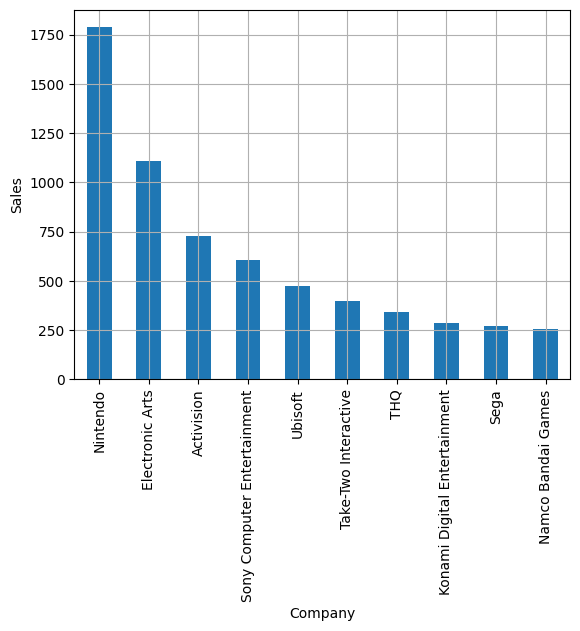

In [11]:
# biggest 10 global sales by Company
df.groupby("Company")['Global_Sales'].sum().nlargest(10).plot(kind='bar', ylabel="Sales", grid=True)

Visualizing the total `Global_Sales` by a `Company` in each `Year`
<p dir='rtl'>
عرض بيانات مجموع <code>Global_Sales</code> لكل <code>Company</code> فى كل <code>Year</code>
</p>

In [34]:
sales_by_company_per_year = df.groupby(["Company", "Year"])['Global_Sales'].sum()
sales_by_company_per_year

Company                       Year
10TACLE Studios               2006    0.02
                              2007    0.09
1C Company                    2009    0.01
                              2011    0.09
20th Century Fox Video Games  1981    1.35
                                      ... 
imageepoch Inc.               2014    0.04
inXile Entertainment          2015    0.09
mixi, Inc                     2015    0.86
responDESIGN                  2004    0.09
                              2005    0.05
Name: Global_Sales, Length: 2370, dtype: float32

<Axes: title={'center': 'Total Global_Sales by a Company in each Year'}, xlabel='Year', ylabel='Total Sales'>

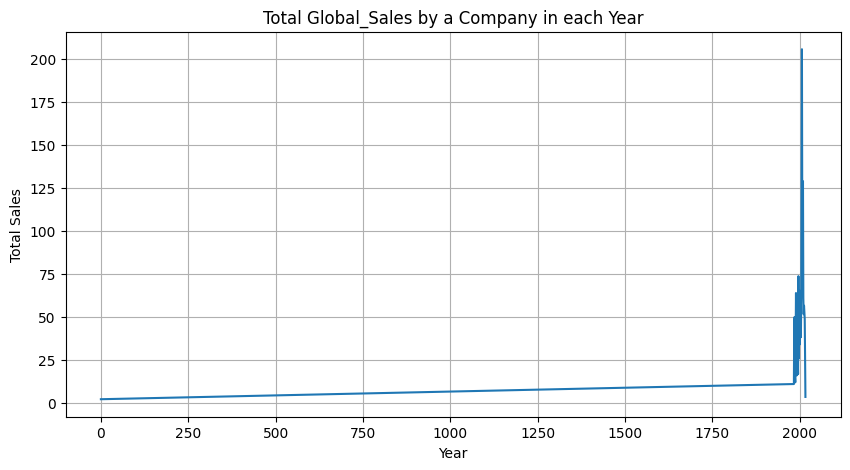

In [65]:
sales_by_company_per_year.loc['Nintendo'].plot(
    ylabel="Total Sales", 
    title="Total Global_Sales by a Company in each Year", 
    figsize=(10,5), 
    grid=True
)

you can see that it's messey because we have a `Year = 0`, let's display the `Year` starting from `1980`
<p dir='rtl'>
كما ترون البيان معقد لأننا لدينا <code>Year = 0</code> لنعرض <code>Year</code> بدايةً من سنه <code>1980</code>
</p>

In [39]:
YEARS_STARTS = 1980

<Axes: title={'center': 'Total Global_Sales for Nintendo in each Year starting from 2000'}, xlabel='Year', ylabel='Total Sales'>

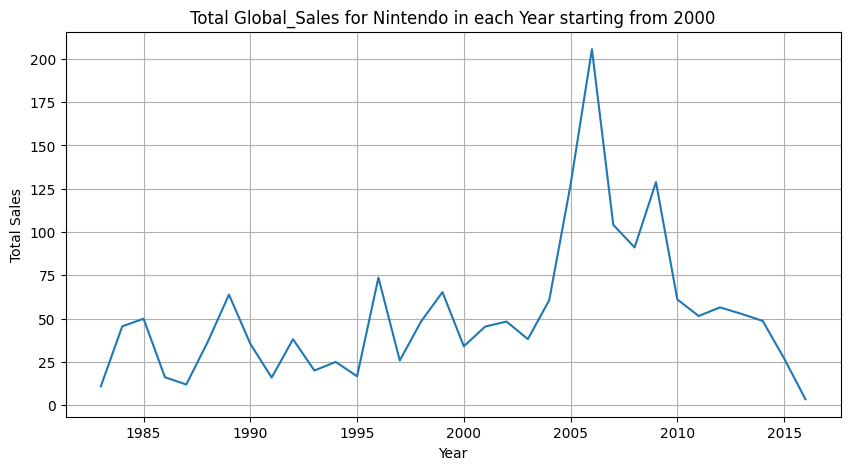

In [40]:
sales_by_company_per_year['Nintendo'].loc[YEARS_STARTS:].plot(
    title="Total Global_Sales for Nintendo in each Year starting from 2000", 
    ylabel="Total Sales",
    figsize=(10,5),
    grid=True
)

<Axes: title={'center': 'Total Global_Sales For Activision in each Year starting from 2000 '}, xlabel='Year', ylabel='Total Sales'>

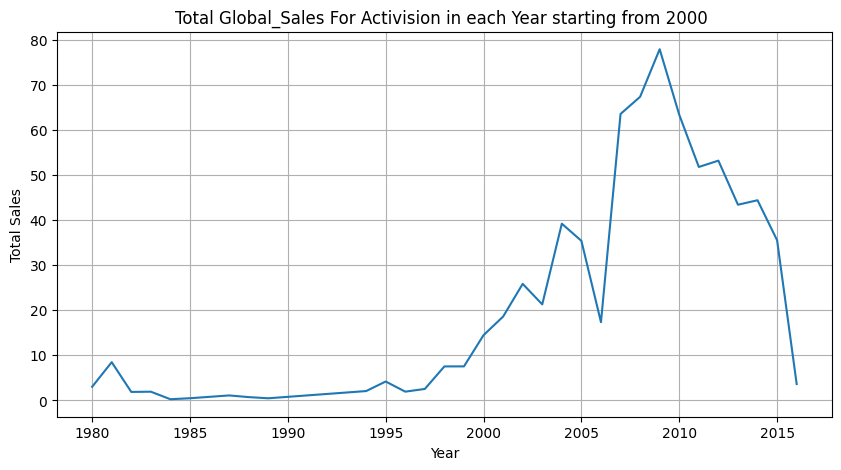

In [60]:
activision = sales_by_company_per_year['Activision'].loc[YEARS_STARTS:]
activision.plot(
    title="Total Global_Sales For Activision in each Year starting from 2000 ", 
    ylabel="Total Sales",
    figsize=(10,5),
    grid=True
)

## Bitwise Operators

* **&** = `and`
* **|** = `or`

**Example**

`(df['Company'] == "Activision")`: find all companies that = `Activision`

`(df['Year'] <= 2010) & (df['Year'] >= 2006)`: find all years where `year <= 2010 and year >= 2006`

<p dir='rtl'>
<code>(df['Company'] == "Activision")</code>: ابحث عن كل شركات <code>Activision</code>
</p>
<p dir='rtl'>
<code>(df['Year'] <= 2010) & (df['Year'] >= 2006)</code>: ابحث عن كل السنين حيث <code>year <= 2010 and year >= 2006</code>
</p>



In [38]:
activision_best_games = df.loc[(df['Company'] == "Activision") & (df['Year'] <= 2010) & (df['Year'] >= 2006)]
activision_best_games

,Name,Platform,Year,Genre,Company,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.52
41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
71,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
...,...,...,...,...,...,...,...,...,...,...
16337,Greg Hastings' Tournament Paintball Max'd,PS2,2006,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16357,Monster Jam,PC,2007,Racing,Activision,0.01,0.00,0.00,0.00,0.01
16447,Madagascar: Escape 2 Africa,PC,2008,Action,Activision,0.01,0.00,0.00,0.00,0.01


<Axes: xlabel='Name'>

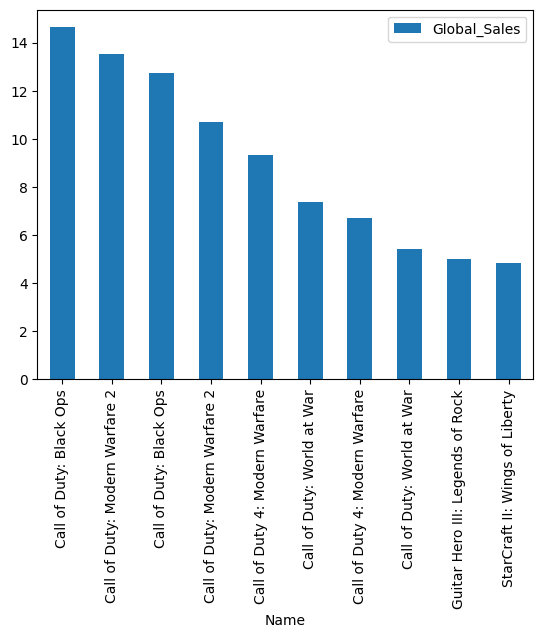

In [64]:
activision_best_games[["Name", "Global_Sales"]].nlargest(10, "Global_Sales").plot(kind='bar', x="Name")